### Goal
Create the highest scoring model to classify clothing images!

In [17]:
import tensorflow as tf 
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
import numpy as np 
import matplotlib.pyplot as plt 

print (tf.__version__) 

2.7.0


In [4]:
# importing the MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

Loading the dataset returns four NumPy arrays:

   * The train_images and train_labels arrays are the training set—the data the model uses to learn.
   * The model is tested against the test set, the test_images, and test_labels arrays.


The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The labels are an array of integers, ranging from 0 to 9. These correspond to the class of clothing the image represents:

|Label|Class|
|---|---|
|0|T-shirt/top|
|1|Trouser|
|2|Pullover|
|3|Dress|
|4|Coat|
|5|Sandal|
|6|Shirt|
|7|Sneaker|
|8|Bag|
|9|Ankle boot|

Each image is mapped to a single label. Since the class names are not included with the dataset, store them here to use later when plotting the images:

In [6]:
# returns 4 numpy arrays: 2 training sets and 2 test sets
# images: 28x28 arrays, pixel values: 0 to 255
# labels: array of integers: 0 to 9 => class of clothings
# Training set: 60,000 images, Testing set: 10,000 images

# class names are not included, need to create them to plot the images  
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Explore the data
Let's explore the format of the dataset before training the model. The following shows there are 60,000 images in the training set, with each image represented as 28 x 28 pixels:




In [9]:
print("X_train shape :", X_train.shape)
print("y_train shape :", y_train.shape)

X_train shape : (60000, 28, 28)
y_train shape : (60000,)


In [10]:
print("X_test: ", X_test.shape)
print("y_test: ", y_test.shape)

X_test:  (10000, 28, 28)
y_test:  (10000,)


In [6]:
len(train_labels)

60000

* Each label is an integer between 0 and 9:



In [8]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

* There are 10,000 images in the test set. Again, each image is represented as 28 x 28 pixels:




In [9]:
test_images.shape

(10000, 28, 28)

* And the test set contains 10,000 images labels:




In [11]:
len(test_labels)

10000

### Preprocess the data
The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

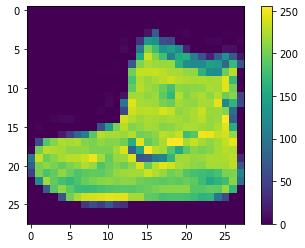

In [11]:
# vizualize the first image from the training dataset
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the training set and the testing set be preprocessed in the same way:

**Normalizing the data**

In [13]:
# scale the values to a range of 0 to 1 of both data sets
X_train = X_train / 255.0

X_test = X_test / 255.0

* To verify that the data is in the correct format and that you're ready to build and train the network, let's display the first 25 images from the training set and display the class name below each image.

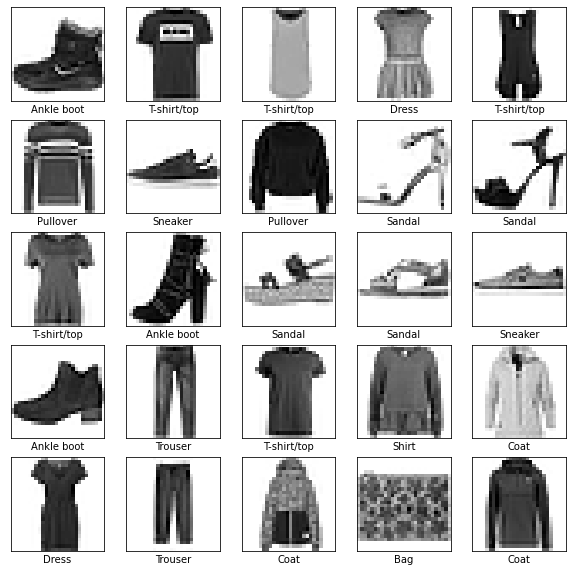

In [14]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

### Training the first NN model
1. Step 1 - Build the architecture

1. Step 2 - Compile the model

1. Step 3 - Train the model

1. Step 4 - Evaluate the model

### Build the model
Building the neural network requires configuring the layers of the model, then compiling the model.

   #### Set up the layers
The basic building block of a neural network is the layer. Layers extract representations from the data fed into them. Hopefully, these representations are meaningful for the problem at hand.

* Most of deep learning consists of chaining together simple layers. Most layers, such as tf.keras.layers.Dense, have parameters that are learned during training.




In [15]:
# model = tf.keras.Sequential([
#     tf.keras.layers.Flatten(input_shape=(28, 28)),
#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dense(10)
# ])

### Compile the model
Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:

* Loss function —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
* Optimizer —This is how the model is updated based on the data it sees and its loss function.
* Metrics —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

In [16]:
# model.compile(optimizer='adam',
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])

### Train the model
Training the neural network model requires the following steps:

1. Feed the training data to the model. In this example, the training data is in the train_images and train_labels arrays.
1. The model learns to associate images and labels.
1. You ask the model to make predictions about a test set—in this example, the test_images array.
1. Verify that the predictions match the labels from the test_labels array.
### Feed the model
To start training, call the model.fit method—so called because it "fits" the model to the training data:

In [18]:
# Step 1 - Build the architecture
# Model a simple 3-layer neural network
model_3 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
model_3.summary() 

# Step 2 - Compile the model
model_3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [19]:
#Step 3 - Train the model, by fitting it to the training data
# 5 epochs, and split the training set into 80/20 for validation
model_3.fit(X_train, y_train, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 1s 769us/step - loss: 0.5153 - accuracy: 0.8200 - val_loss: 0.3990 - val_accuracy: 0.8572
Epoch 2/5
1500/1500 [==============================] - 1s 709us/step - loss: 0.3866 - accuracy: 0.8589 - val_loss: 0.3950 - val_accuracy: 0.8595
Epoch 3/5
1500/1500 [==============================] - 1s 741us/step - loss: 0.3432 - accuracy: 0.8750 - val_loss: 0.3753 - val_accuracy: 0.8658
Epoch 4/5
1500/1500 [==============================] - 1s 710us/step - loss: 0.3219 - accuracy: 0.8819 - val_loss: 0.3332 - val_accuracy: 0.8797
Epoch 5/5
1500/1500 [==============================] - 1s 704us/step - loss: 0.2989 - accuracy: 0.8892 - val_loss: 0.3289 - val_accuracy: 0.8826



### Evaluate accuracy
Next, compare how the model performs on the test dataset:

In [20]:
#Step 4 - Evaluate the model
test_loss, test_acc = model_3.evaluate(X_test, y_test)
print("Model - 3 layers - test loss:", test_loss * 100)
print("Model - 3 layers - test accuracy:", test_acc * 100)

313/313 [==============================] - 0s 757us/step - loss: 0.3606 - accuracy: 0.8712
Model - 3 layers - test loss: 36.06093227863312
Model - 3 layers - test accuracy: 87.12000250816345



### Is deeper more accurate?
Comparing network depth, with a NN-6 and NN-12



In [21]:
# Model a simple 6-layer neural network 
model_6 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
#model_6.summary() 
model_6.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
#Train the NN-6 with 5 epochs 
model_6.fit(X_train, y_train, epochs=5, validation_split=0.2)

#Evaluate the model with test datasets
test_loss, test_acc = model_6.evaluate(X_test, y_test)
print("Model - 6 layers - test loss:", test_loss * 100)
print("Model - 6 layers - test accuracy:", test_acc * 100)

Epoch 1/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.5176 - accuracy: 0.8110 - val_loss: 0.4346 - val_accuracy: 0.8460
Epoch 2/5
1500/1500 [==============================] - 1s 946us/step - loss: 0.3809 - accuracy: 0.8600 - val_loss: 0.3634 - val_accuracy: 0.8635
Epoch 3/5
1500/1500 [==============================] - 1s 952us/step - loss: 0.3479 - accuracy: 0.8711 - val_loss: 0.3587 - val_accuracy: 0.8688
Epoch 4/5
1500/1500 [==============================] - 1s 934us/step - loss: 0.3241 - accuracy: 0.8806 - val_loss: 0.3394 - val_accuracy: 0.8752
Epoch 5/5
313/313 [==============================] - 0s 768us/step - loss: 0.3682 - accuracy: 0.8685
Model - 6 layers - test loss: 36.817628145217896
Model - 6 layers - test accuracy: 86.84999942779541


In [23]:
# Model a simple 12-layer neural network 
model_12 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
#model_12.summary() 
model_12.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [24]:
#Train the NN-12 with 5 epochs 
model_12.fit(X_train, y_train, epochs=5, validation_split=0.2)

#Evaluate the model
test_loss, test_acc = model_12.evaluate(X_test, y_test)
print("Model - 12 layers - test loss:", test_loss * 100)
print("Model - 12 layers - test accuracy:", test_acc * 100)

Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.6317 - accuracy: 0.7615 - val_loss: 0.4425 - val_accuracy: 0.8360
Epoch 2/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4381 - accuracy: 0.8435 - val_loss: 0.4250 - val_accuracy: 0.8606
Epoch 3/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3996 - accuracy: 0.8586 - val_loss: 0.3792 - val_accuracy: 0.8650
Epoch 4/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3749 - accuracy: 0.8672 - val_loss: 0.3960 - val_accuracy: 0.8605
Epoch 5/5
313/313 [==============================] - 0s 871us/step - loss: 0.4281 - accuracy: 0.8550
Model - 12 layers - test loss: 42.80678629875183
Model - 12 layers - test accuracy: 85.50000190734863


**Does increasing epochs improve our classification?**

Re-train the NN-3 with 50 epochs, and plot the loss and accuracy

In [25]:
# NN-3, 50 epochs 
history_NN3_50=model_3.fit(X_train, y_train, epochs=50, validation_split=0.2)

test_loss, test_acc = model_3.evaluate(X_test, y_test)
print("Model - 3 layers - test loss:", test_loss * 100)
print("Model - 3 layers - test accuracy:", test_acc * 100)

Epoch 1/50
1500/1500 [==============================] - 1s 727us/step - loss: 0.2840 - accuracy: 0.8942 - val_loss: 0.3294 - val_accuracy: 0.8802
Epoch 2/50
1500/1500 [==============================] - 1s 712us/step - loss: 0.2728 - accuracy: 0.8978 - val_loss: 0.3368 - val_accuracy: 0.8779
Epoch 3/50
1500/1500 [==============================] - 1s 717us/step - loss: 0.2615 - accuracy: 0.9034 - val_loss: 0.3259 - val_accuracy: 0.8832
Epoch 4/50
1500/1500 [==============================] - 1s 709us/step - loss: 0.2508 - accuracy: 0.9071 - val_loss: 0.3156 - val_accuracy: 0.8866
Epoch 5/50
1500/1500 [==============================] - 1s 710us/step - loss: 0.2397 - accuracy: 0.9100 - val_loss: 0.3140 - val_accuracy: 0.8902
Epoch 6/50
1500/1500 [==============================] - 1s 713us/step - loss: 0.2320 - accuracy: 0.9129 - val_loss: 0.3294 - val_accuracy: 0.8869
Epoch 7/50
1500/1500 [==============================] - 1s 715us/step - loss: 0.2244 - accuracy: 0.9165 - val_loss: 0.3168 -

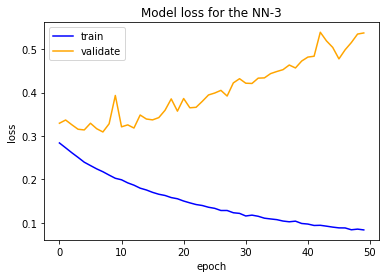

In [26]:
#Plot loss results for training data and testing data 
plt.plot(history_NN3_50.history['loss'], 'blue')
plt.plot(history_NN3_50.history['val_loss'], 'orange')
plt.title('Model loss for the NN-3')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')

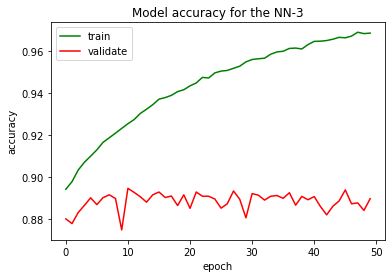

In [27]:
#Plot accuracy results for training data and testing data 
plt.plot(history_NN3_50.history['accuracy'], 'green')
plt.plot(history_NN3_50.history['val_accuracy'], 'red')
plt.title('Model accuracy for the NN-3')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')

**Re-train the NN-6 with 50 epochs, and plot the loss and accuracy**

In [28]:
# NN-6, 50 epochs
history_NN6_50=model_6.fit(X_train, y_train, epochs=50, validation_split=0.2)

test_loss, test_acc = model_6.evaluate(X_test, y_test)
print("Model - 6 layers - test loss:", test_loss * 100)
print("Model - 6 layers - test accuracy:", test_acc * 100)

Epoch 1/50
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2907 - accuracy: 0.8913 - val_loss: 0.3245 - val_accuracy: 0.8827
Epoch 2/50
1500/1500 [==============================] - 1s 989us/step - loss: 0.2749 - accuracy: 0.8977 - val_loss: 0.3244 - val_accuracy: 0.8807
Epoch 3/50
1500/1500 [==============================] - 1s 931us/step - loss: 0.2663 - accuracy: 0.8990 - val_loss: 0.3167 - val_accuracy: 0.8888
Epoch 4/50
1500/1500 [==============================] - 1s 936us/step - loss: 0.2564 - accuracy: 0.9036 - val_loss: 0.3515 - val_accuracy: 0.8783
Epoch 5/50
1500/1500 [==============================] - 1s 931us/step - loss: 0.2468 - accuracy: 0.9073 - val_loss: 0.3240 - val_accuracy: 0.8838
Epoch 6/50
1500/1500 [==============================] - 1s 931us/step - loss: 0.2388 - accuracy: 0.9105 - val_loss: 0.3353 - val_accuracy: 0.8808
Epoch 7/50
1500/1500 [==============================] - 1s 940us/step - loss: 0.2298 - accuracy: 0.9127 - val_loss: 0.3133 - v

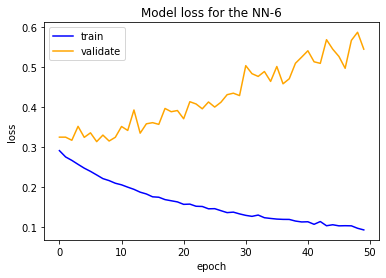

In [30]:
#Plot loss results for training data and testing data
plt.plot(history_NN6_50.history['loss'], 'blue')
plt.plot(history_NN6_50.history['val_loss'], 'orange')
plt.title('Model loss for the NN-6')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left');

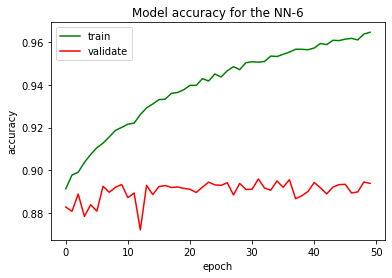

In [31]:
#Plot accuracy results for training data and testing data 
plt.plot(history_NN6_50.history['accuracy'], 'green')
plt.plot(history_NN6_50.history['val_accuracy'],'red')
plt.title('Model accuracy for the NN-6')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left');

**Re-train the NN-12 with 50 epochs, and plot the loss and accuracy**

In [32]:
# NN-12, 50 epochs 
history_NN12_50=model_12.fit(X_train, y_train, epochs=50, validation_split=0.2)

test_loss, test_acc = model_12.evaluate(X_test, y_test)
print("Model - 12 layers - test loss:", test_loss * 100)
print("Model - 12 layers - test accuracy:", test_acc * 100)


Epoch 1/50
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3384 - accuracy: 0.8790 - val_loss: 0.3860 - val_accuracy: 0.8623
Epoch 2/50
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3308 - accuracy: 0.8805 - val_loss: 0.3332 - val_accuracy: 0.8802
Epoch 3/50
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3106 - accuracy: 0.8885 - val_loss: 0.3789 - val_accuracy: 0.8777
Epoch 4/50
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3010 - accuracy: 0.8916 - val_loss: 0.3408 - val_accuracy: 0.8792
Epoch 5/50
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2948 - accuracy: 0.8917 - val_loss: 0.3802 - val_accuracy: 0.8677
Epoch 6/50
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2941 - accuracy: 0.8960 - val_loss: 0.3420 - val_accuracy: 0.8771
Epoch 7/50
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2807 - accuracy: 0.8975 - val_loss: 0.3450 - val_accuracy:

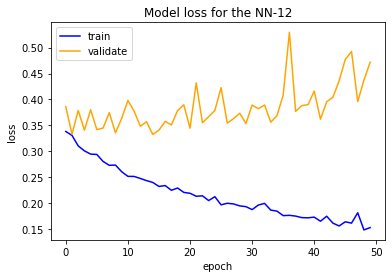

In [33]:
#Plot loss results for training data and testing data
plt.plot(history_NN12_50.history['loss'], 'blue')
plt.plot(history_NN12_50.history['val_loss'], 'orange')
plt.title('Model loss for the NN-12')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left');

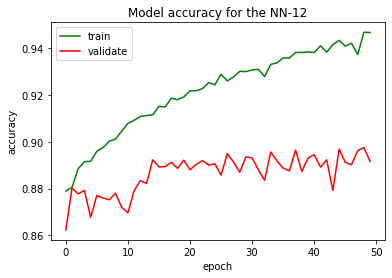

In [34]:
#Plot accuracy results for training data and testing data 
plt.plot(history_NN12_50.history['accuracy'], 'green')
plt.plot(history_NN12_50.history['val_accuracy'], 'red')
plt.title('Model accuracy for the NN-12')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left');

### Making predictions with the NN-3


In [35]:
# confidence of the model that the image corresponds to the label 
predictions = model_3.predict(X_test)
predictions.shape #(10000, 10)
predictions[0]

array([3.3535874e-28, 2.4835109e-27, 1.0741620e-15, 1.3928500e-23,
       7.4700548e-30, 3.8609627e-10, 8.7493545e-22, 3.6612985e-10,
       6.2323460e-17, 1.0000000e+00], dtype=float32)

In [36]:
np.argmax(predictions[0])

9

In [37]:
class_names[9]

'Ankle boot'

* A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing. You can see which label has the highest confidence value:




In [39]:
#Ankle boot has the highest confidence value 
y_test[0]

9

* Graph this to look at the full set of 10 class predictions.




In [40]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### Verify predictions
With the model trained, you can use it to make predictions about some images.

Let's look at the 0th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label.

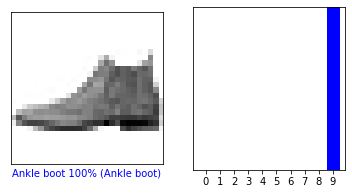

In [42]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

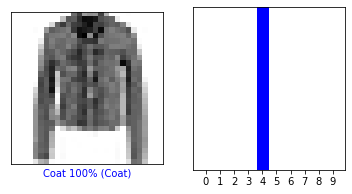

In [43]:
i = 10
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

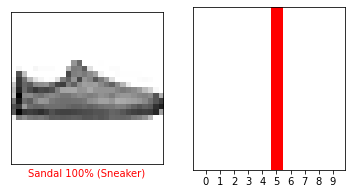

In [44]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

* Let's plot several images with their predictions. Note that the model can be wrong even when very confident.

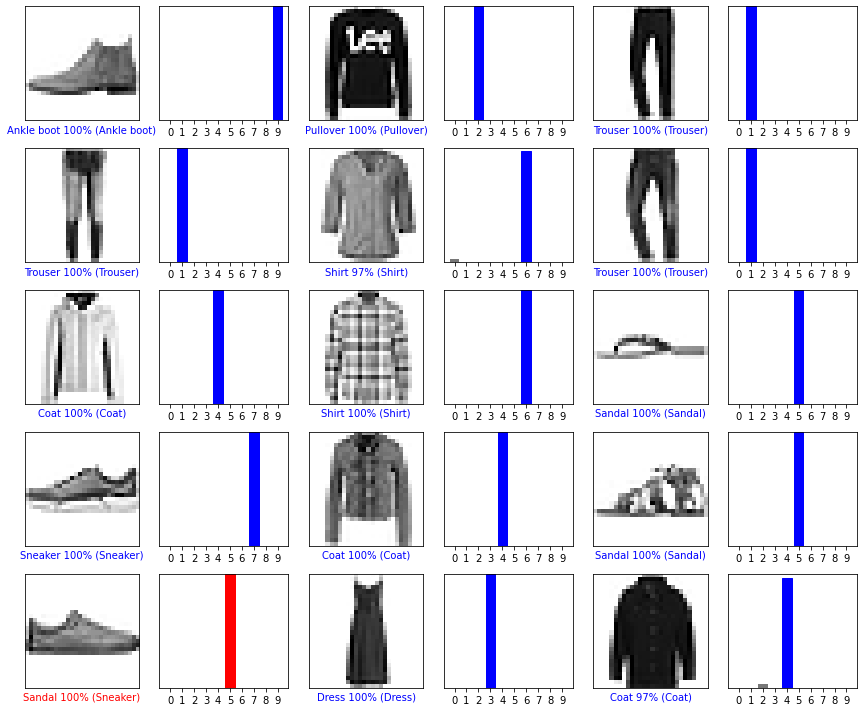

In [45]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, X_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()

### We can also make predictions with the NN-12


In [53]:
predictions = model_12.predict(X_test)

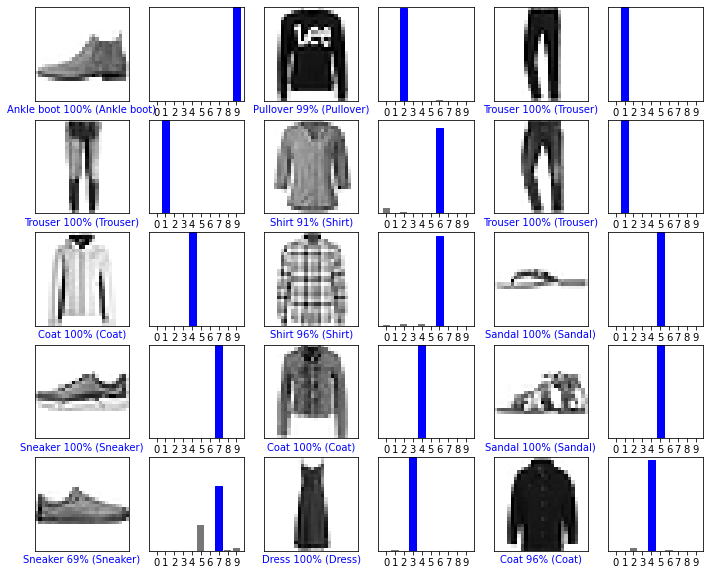

In [54]:
# Plot the first 15 test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
plt.title("Predictions of first 15 images, with NN-12")
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, X_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test)
    

## References:

* [Basic classification: Classify images of clothing](https://www.tensorflow.org/tutorials/keras/classification)

* [Exploring Neural Networks with fashion MNIST](https://github.com/codingyogini/TensorFlow-NNs/blob/master/NN_MNIST_depth.ipynb)

- [Top 9 Machine Learning Algorithms to Use for SEO & Marketing](https://online.datasciencedojo.com/blogs/top-9-machine-learning-algorithms-to-use-for-seo-marketing?utm_content=195033979&utm_medium=social&utm_source=linkedin&hss_channel=lcp-3740012)

![Convolutional Neural Networks](cnn.png)